In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

Q1)1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [2]:
election= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)

In [3]:
election.head(5)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [4]:
election.shape

(1525, 9)

In [5]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [6]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [7]:
election.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [8]:
replace = {
    "gender" : {"male" : 1 , "female" : 0},
    "vote"  :  { "Conservative" : 1, "Labour" : 0}
}

In [9]:
election = election.replace(replace)

In [10]:
election["gender"].value_counts()

0    812
1    713
Name: gender, dtype: int64

In [11]:
election["vote"].value_counts()

0    1063
1     462
Name: vote, dtype: int64

In [12]:
election["age"].value_counts()

37    42
49    39
35    39
47    38
54    37
      ..
87     3
92     2
90     1
93     1
91     1
Name: age, Length: 70, dtype: int64

In [13]:
election["economic.cond.national"].value_counts()

3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64

In [14]:
election["economic.cond.household"].value_counts()

3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [15]:
election["Blair"].value_counts()

4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64

In [16]:
election["Hague"].value_counts()

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

In [154]:
election["Europe"].value_counts()

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64

In [17]:
election["political.knowledge"].value_counts()

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

In [19]:
election.skew()

vote                       0.858449
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
gender                     0.130239
dtype: float64

Q2)Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

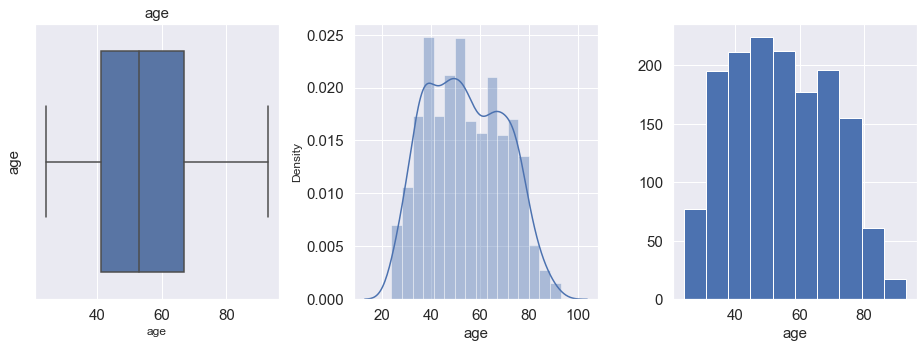

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=election,orient='v',ax=ax1)
ax1.set_ylabel('age', fontsize=15)
ax1.set_title('age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(election['age'],ax=ax2)
ax2.set_xlabel('age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(election['age'])
ax3.set_xlabel('age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

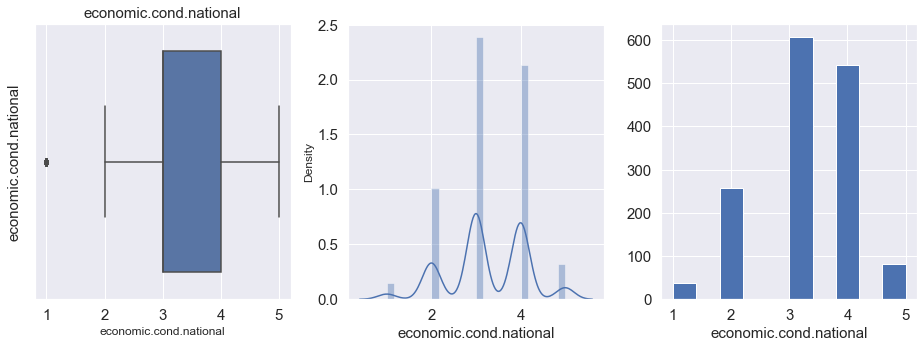

In [20]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='economic.cond.national',data=election,orient='v',ax=ax1)
ax1.set_ylabel('economic.cond.national', fontsize=15)
ax1.set_title('economic.cond.national', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(election['economic.cond.national'],ax=ax2)
ax2.set_xlabel('economic.cond.national', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(election['economic.cond.national'])
ax3.set_xlabel('economic.cond.national', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

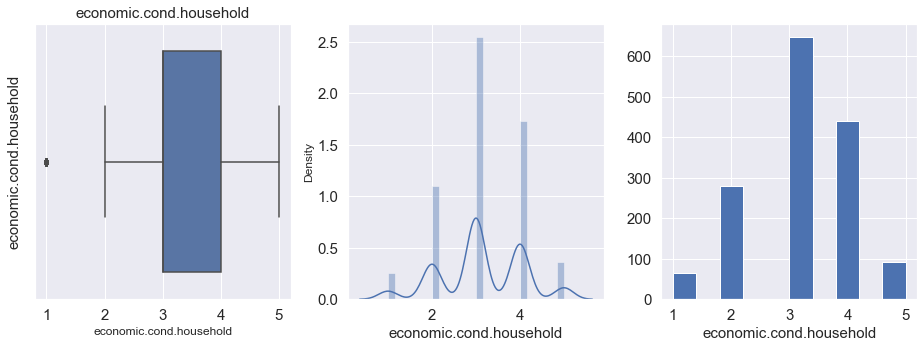

In [21]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='economic.cond.household',data=election,orient='v',ax=ax1)
ax1.set_ylabel('economic.cond.household', fontsize=15)
ax1.set_title('economic.cond.household', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(election['economic.cond.household'],ax=ax2)
ax2.set_xlabel('economic.cond.household', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(election['economic.cond.household'])
ax3.set_xlabel('economic.cond.household', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

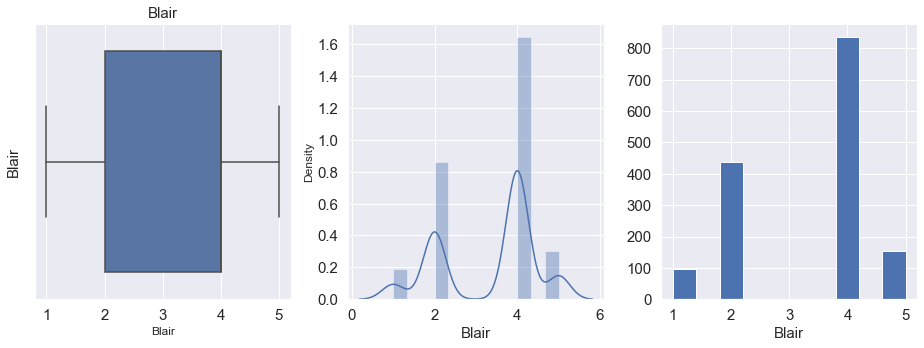

In [22]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Blair',data=election,orient='v',ax=ax1)
ax1.set_ylabel('Blair', fontsize=15)
ax1.set_title('Blair', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(election['Blair'],ax=ax2)
ax2.set_xlabel('Blair', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(election['Blair'])
ax3.set_xlabel('Blair', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

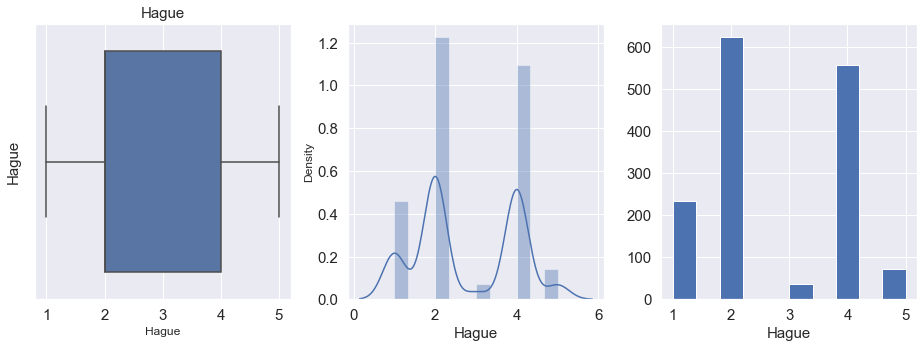

In [23]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Hague',data=election,orient='v',ax=ax1)
ax1.set_ylabel('Hague', fontsize=15)
ax1.set_title('Hague', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(election['Hague'],ax=ax2)
ax2.set_xlabel('Hague', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(election['Hague'])
ax3.set_xlabel('Hague', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

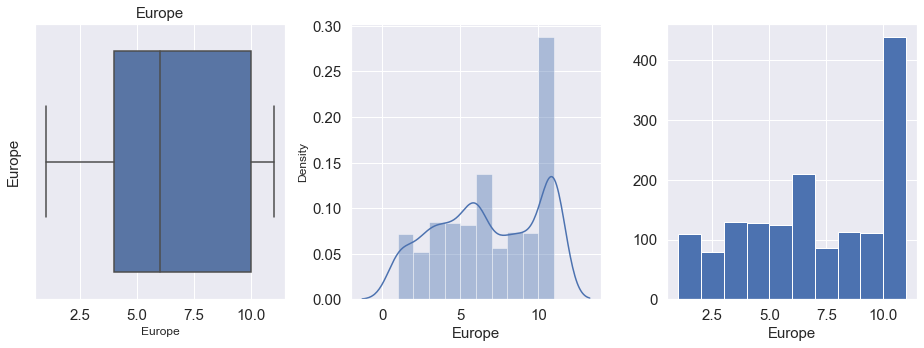

In [24]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Europe',data=election,orient='v',ax=ax1)
ax1.set_ylabel('Europe', fontsize=15)
ax1.set_title('Europe', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(election['Europe'],ax=ax2)
ax2.set_xlabel('Europe', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(election['Europe'])
ax3.set_xlabel('Europe', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

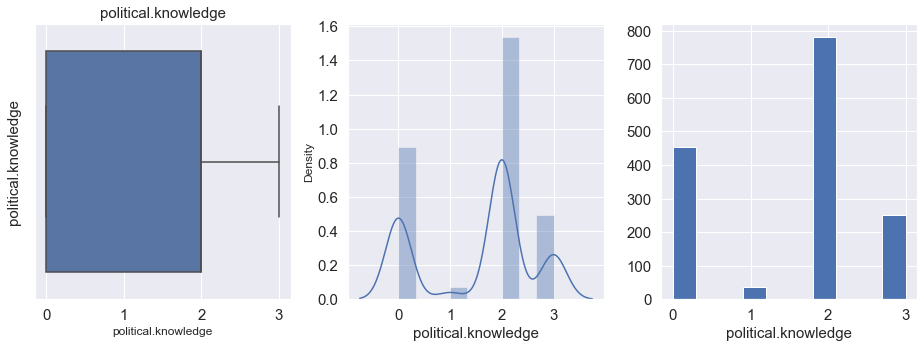

In [25]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='political.knowledge',data=election,orient='v',ax=ax1)
ax1.set_ylabel('political.knowledge', fontsize=15)
ax1.set_title('political.knowledge', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(election['political.knowledge'],ax=ax2)
ax2.set_xlabel('political.knowledge', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(election['political.knowledge'])
ax3.set_xlabel('political.knowledge', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

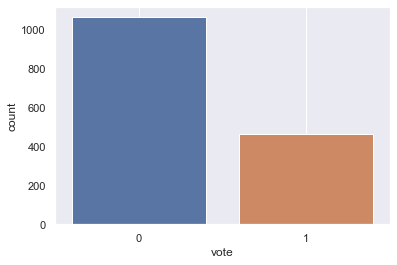

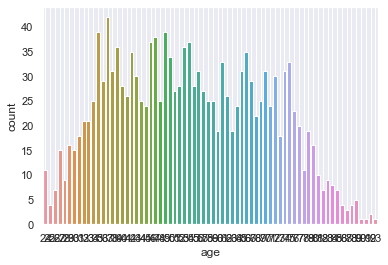

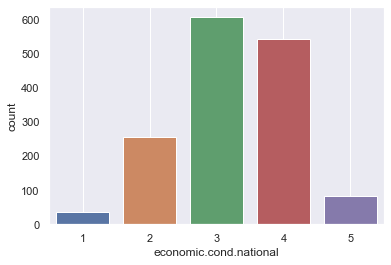

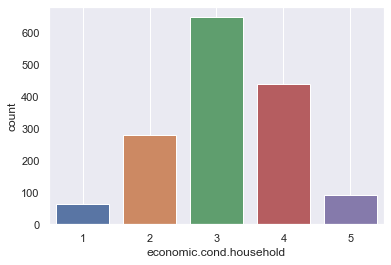

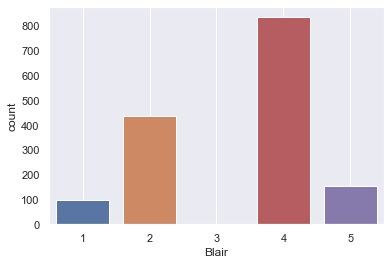

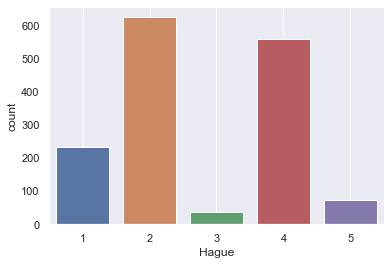

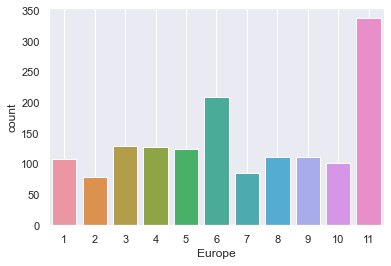

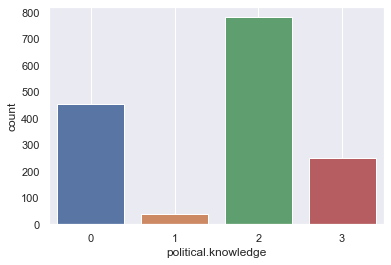

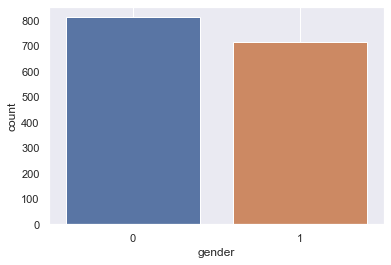

In [26]:
cols = ['vote','age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender']
for i in cols:
    sns.countplot(election[i])
    plt.grid()
    plt.show();

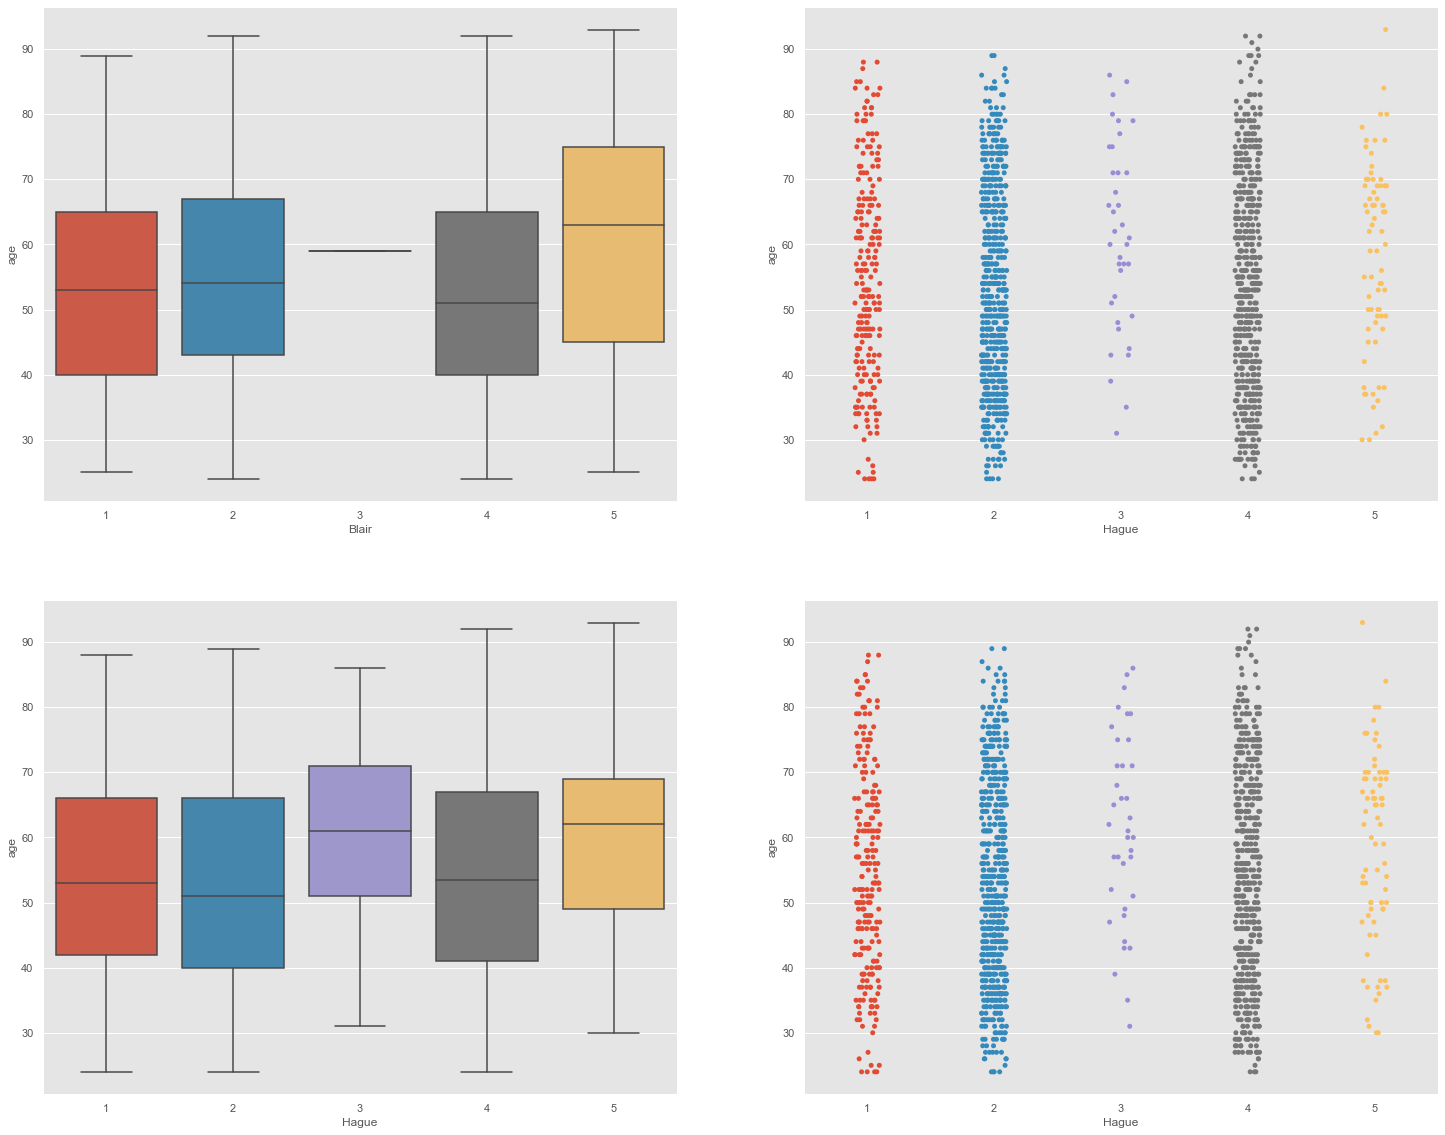

In [161]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(25,20)
sns.boxplot(election["Blair"],election["age"], ax = axes[0][0])
sns.stripplot(election["Hague"],election["age"], ax = axes[0][1])
sns.boxplot(election["Hague"],election["age"], ax = axes[1][0])
sns.stripplot(election["Hague"],election["age"], ax = axes[1][1]);

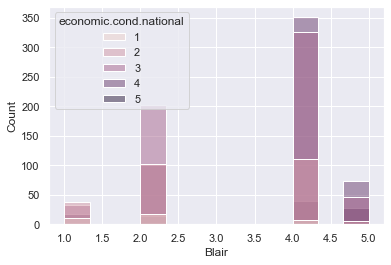

In [28]:
sns.histplot(data =election , x = "Blair", hue = "economic.cond.national");


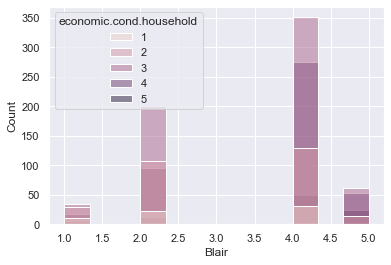

In [47]:
sns.histplot(data =election , x = "Blair", hue = "economic.cond.household");

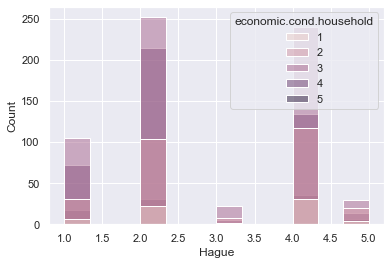

In [30]:
sns.histplot(data =election , x = "Hague", hue = "economic.cond.household");

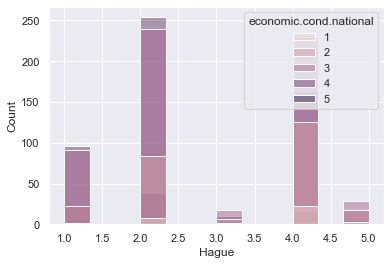

In [31]:
sns.histplot(data =election , x = "Hague", hue = "economic.cond.national");

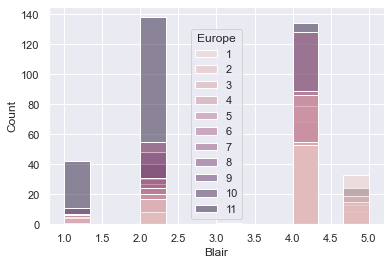

In [32]:
sns.histplot(data =election , x = "Blair", hue = "Europe");

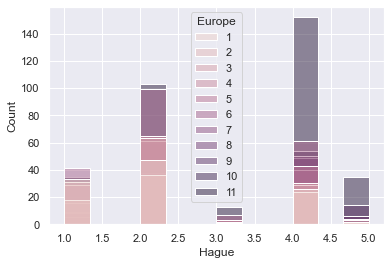

In [33]:
sns.histplot(data =election , x = "Hague", hue = "Europe");

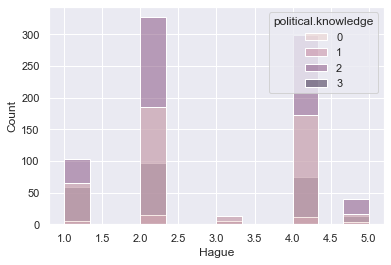

In [34]:
sns.histplot(data =election , x = "Hague", hue = "political.knowledge");

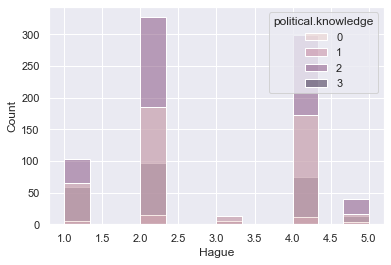

In [35]:
sns.histplot(data =election , x = "Hague", hue = "political.knowledge");

In [36]:
covMatrix = np.cov(election,bias=True)
print (covMatrix)

[[168.69135802 135.48148148 133.34567901 ... 141.51851852 234.92592593
  289.54320988]
 [135.48148148 110.         107.40740741 ... 114.11111111 191.11111111
  235.14814815]
 [133.34567901 107.40740741 105.72839506 ... 112.03703704 185.40740741
  228.60493827]
 ...
 [141.51851852 114.11111111 112.03703704 ... 119.55555556 196.88888889
  242.96296296]
 [234.92592593 191.11111111 185.40740741 ... 196.88888889 338.
  414.59259259]
 [289.54320988 235.14814815 228.60493827 ... 242.96296296 414.59259259
  509.50617284]]


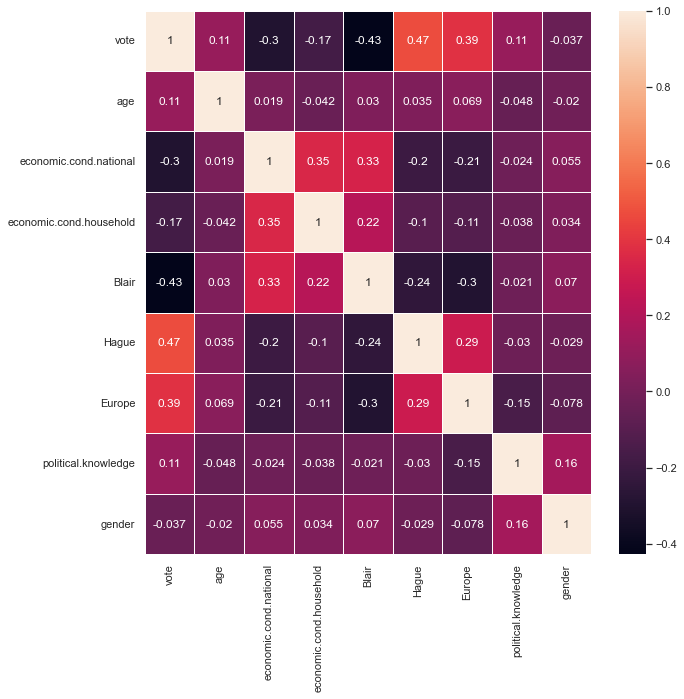

In [37]:
fig, ax = plt.subplots(figsize=(10,10)) 
dataplot = sns.heatmap(election.corr(), annot=True,linewidth = 1)

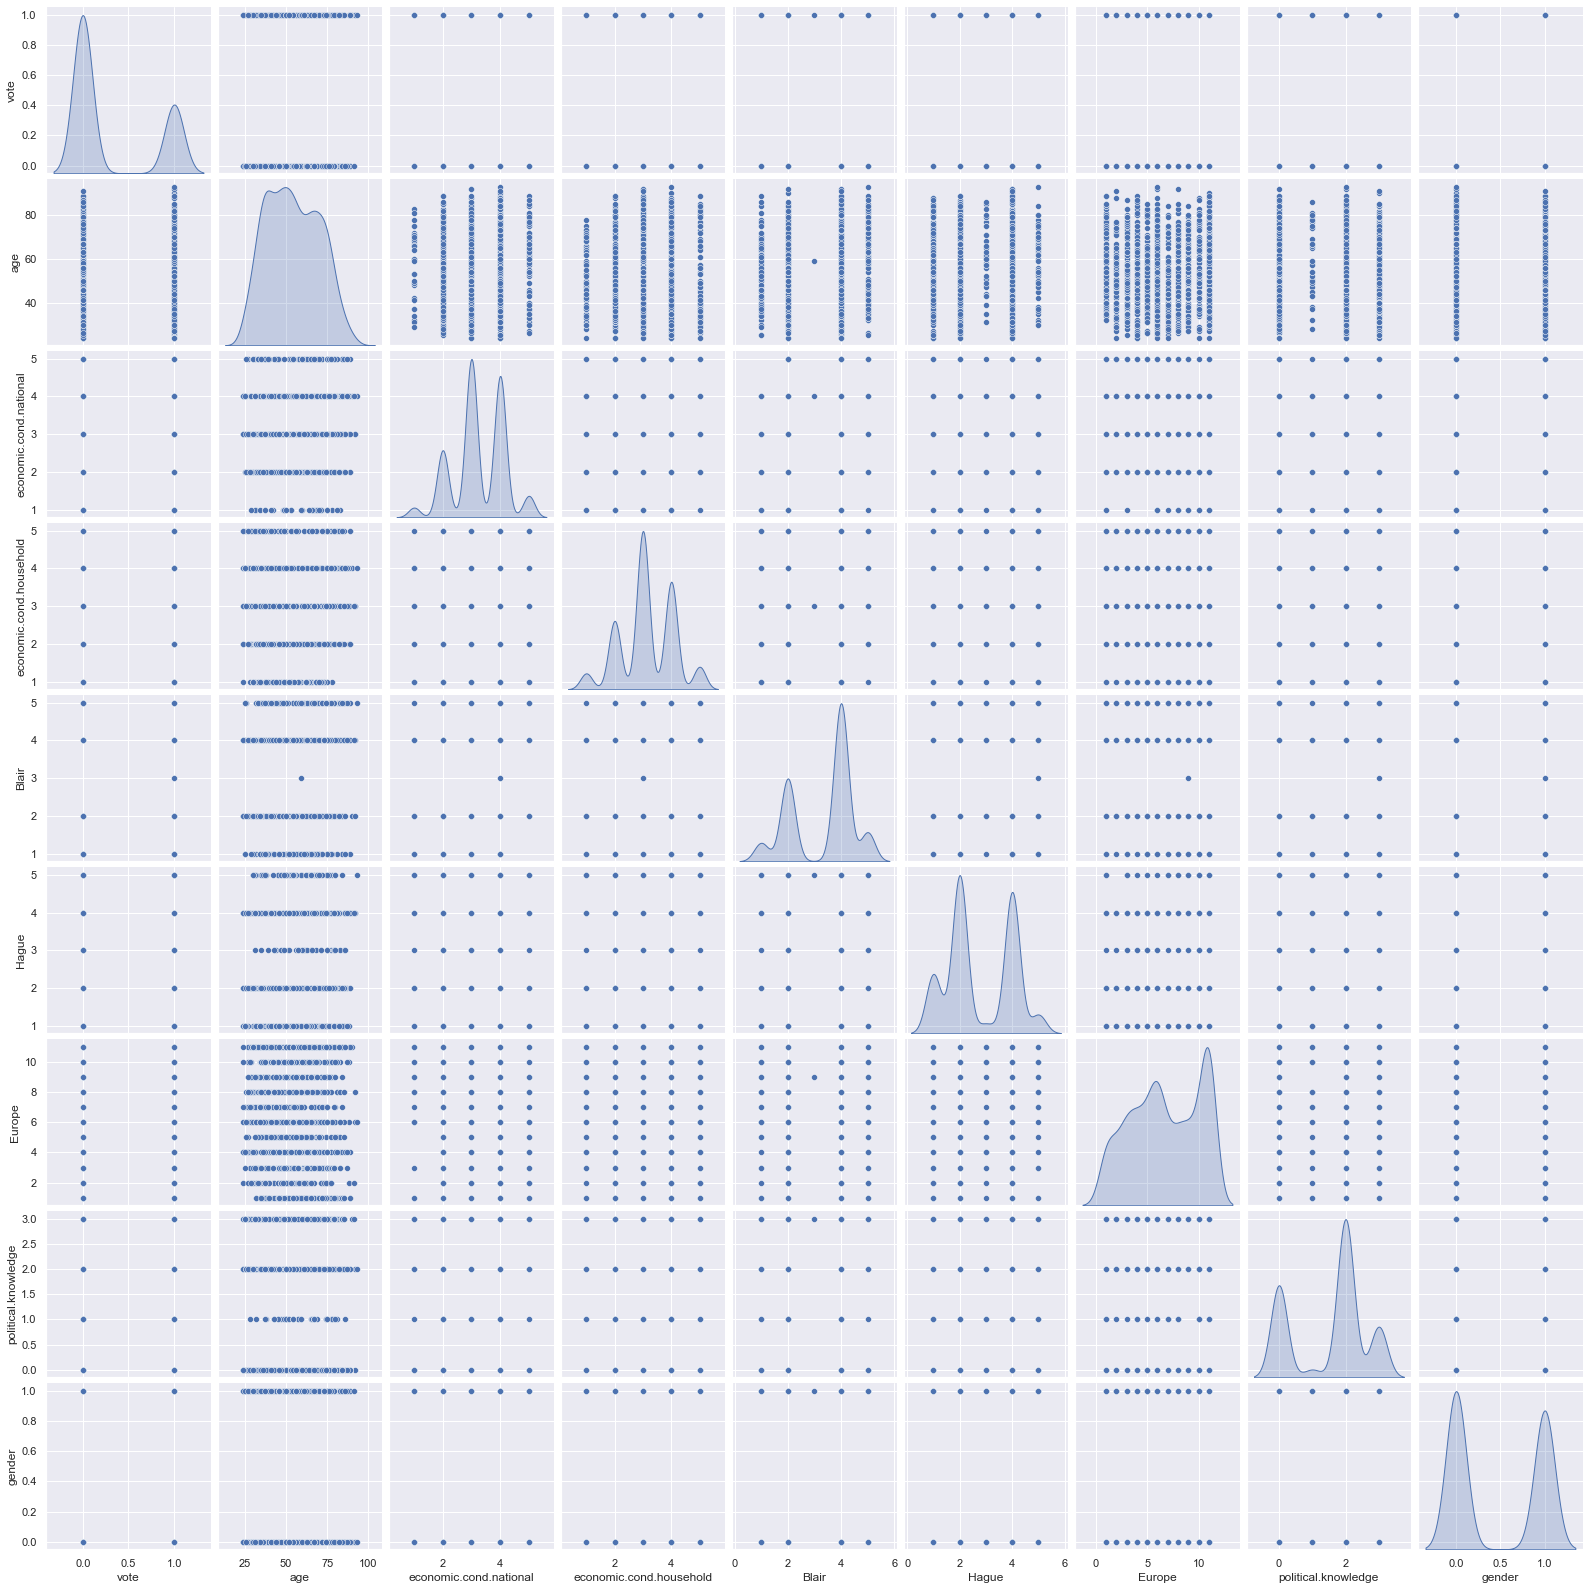

In [38]:
sns.pairplot(election,diag_kind='kde');

### Q3)Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test

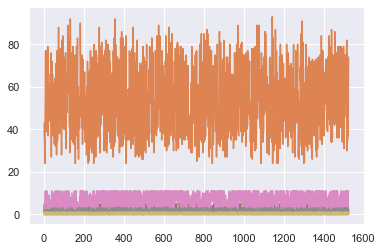

In [39]:
### prior to scaling 
plt.plot(election)
plt.show()

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
scaled = scaler.fit_transform(election)

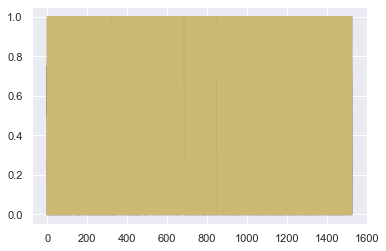

In [44]:
###after scaling
plt.plot(scaled)
plt.show()

In [155]:
election.head(5)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,43,3,3,4,1,2,2,0
2,36,4,4,4,4,5,2,1
3,35,4,4,5,2,3,2,1
4,24,4,2,2,1,4,0,0
5,41,2,2,1,1,6,2,1


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x = election.drop("vote",axis = 1)
y = election.pop("vote")

In [48]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size = .30 ,random_state = 1)

### 1.4 Applying Logistic Regression(LR)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression(tol=0.0001,max_iter=2000,random_state= 0)

In [51]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=2000, random_state=0)

In [52]:
y_train_predict=lr.predict(x_train)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_train ,y_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       735
           1       0.77      0.69      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



AxesSubplot(0.125,0.125;0.62x0.755)


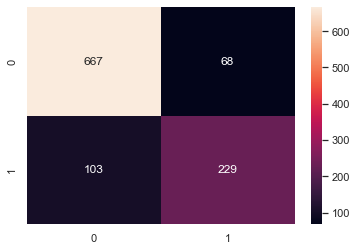

In [55]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True , fmt="2g"));

AxesSubplot(0.125,0.125;0.62x0.755)


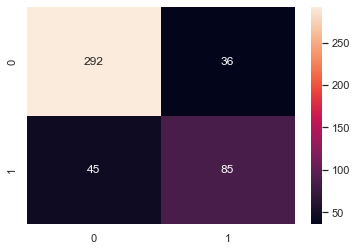

In [56]:
print(sns.heatmap(confusion_matrix(y_test,lr.predict(x_test)),annot=True , fmt="2g"));

In [57]:
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.70      0.65      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



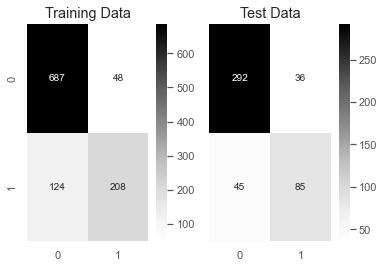

In [157]:
##Logistic Regression Model Evaluation

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
    
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,lr.predict(x_test))),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [59]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train_predict, y_train))

0.16026241799437677


In [60]:
print(mean_squared_error(lr.predict(x_test), y_test))

0.17685589519650655


In [61]:
from sklearn.metrics import roc_auc_score,roc_curve

AUC: 0.889


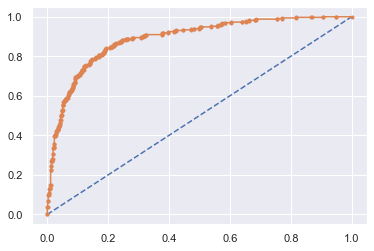

In [63]:
# AUC and ROC for the training data

# predict probabilities
probs = lr.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
LR_train_fpr, LR_train_tpr, LR_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_train_fpr,LR_train_tpr, marker='.')
# show the plot
plt.show()

AUC: 0.882


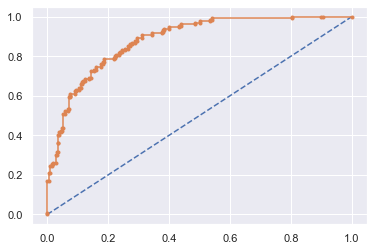

In [65]:
# AUC and ROC for the test data

# predict probabilities
probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
LR_test_fpr, LR_test_tpr, LR_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_test_fpr,LR_test_tpr, marker='.')
# show the plot
plt.show()

### Linear Discriminant Analysis(LDR)

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [67]:
lda = LinearDiscriminantAnalysis()

In [68]:
lda = lda.fit(x_train,y_train)

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       759
           1       0.70      0.76      0.73       308

    accuracy                           0.84      1067
   macro avg       0.80      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



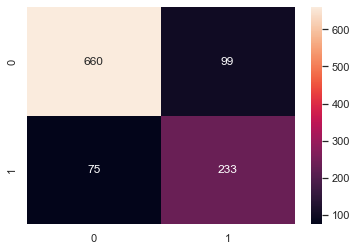

In [69]:
print(sns.heatmap(confusion_matrix(lda.predict(x_train),y_train),annot=True , fmt="2g"));
print(classification_report(lda.predict(x_train),y_train))

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       333
           1       0.66      0.69      0.67       125

    accuracy                           0.82       458
   macro avg       0.77      0.78      0.77       458
weighted avg       0.82      0.82      0.82       458



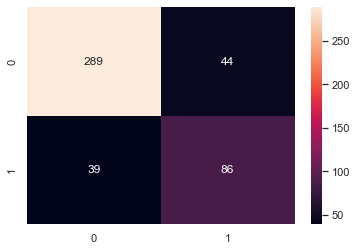

In [70]:
print(sns.heatmap(confusion_matrix(lda.predict(x_test),y_test),annot=True , fmt="2g"));
print(classification_report(lda.predict(x_test),y_test))

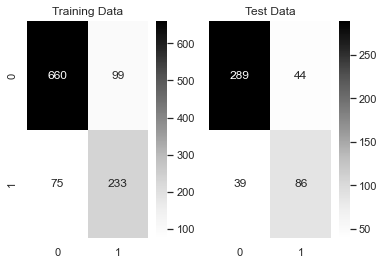

In [71]:
##Linear Discriminant Analysis Model Evaluation

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
    
plot_0 = sns.heatmap((metrics.confusion_matrix(lda.predict(x_train),y_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(lda.predict(x_test),y_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC: 0.889


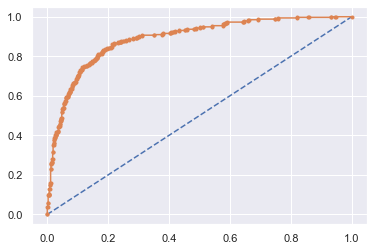

In [74]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
LDR_train_fpr, LDR_train_tpr, LDR_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--');
# plot the roc curve for the model
plt.plot(LDR_train_fpr, LDR_train_tpr, marker='.')
# show the plot

AUC: 0.884


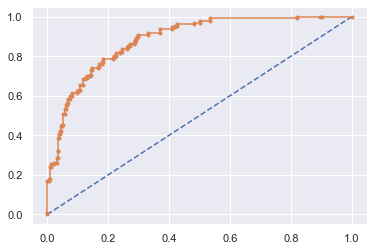

In [75]:
# AUC and ROC for the test data

# predict probabilities
probs = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr, marker='.')
# show the plot
plt.show()

### Q5)Apply KNN Model and Naïve Bayes Model. Interpret the results.

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [78]:
knn = knn.fit(x_train,y_train)

In [79]:
pred_label= knn.predict(x_test)
knn.score(x_test,y_test)

0.7860262008733624

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       759
           1       0.74      0.80      0.77       308

    accuracy                           0.86      1067
   macro avg       0.83      0.84      0.83      1067
weighted avg       0.87      0.86      0.86      1067



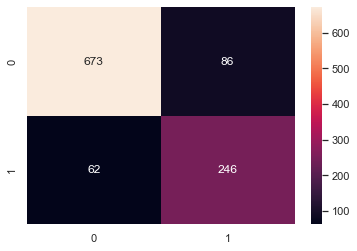

In [80]:
print(sns.heatmap(confusion_matrix(knn.predict(x_train),y_train),annot=True , fmt="2g"));
print(classification_report(knn.predict(x_train),y_train));

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       328
           1       0.62      0.62      0.62       130

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



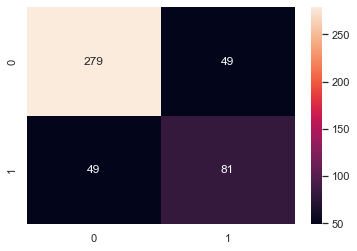

In [81]:
print(sns.heatmap(confusion_matrix(knn.predict(x_test),y_test),annot=True , fmt="2g"));
print(classification_report(knn.predict(x_test),y_test))

AUC: 0.924


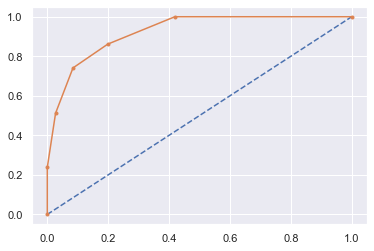

In [83]:
# AUC and ROC for the training data

# predict probabilities
probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
KNN_train_fpr, KNN_train_tpr, KNN_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr, marker='.')
# show the plot

AUC: 0.832


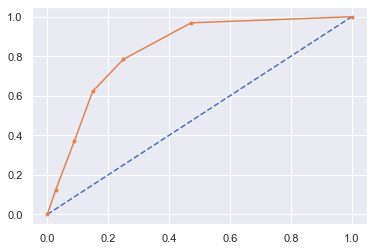

In [84]:
# predict probabilities
probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
KNN_test_fpr, KNN_test_tpr, KNN_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr, marker='.')
# show the plot
plt.show()

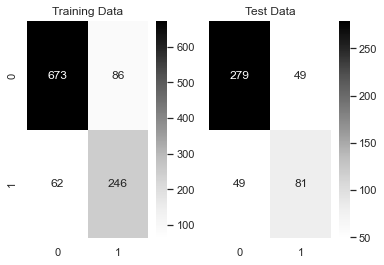

In [85]:
##KNN Model Evaluation

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
    
plot_0 = sns.heatmap((metrics.confusion_matrix(knn.predict(x_train),y_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(knn.predict(x_test),y_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
nb=GaussianNB()

In [88]:
nb= nb.fit(x_train, y_train)

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       741
           1       0.72      0.74      0.73       326

    accuracy                           0.83      1067
   macro avg       0.80      0.81      0.80      1067
weighted avg       0.83      0.83      0.83      1067



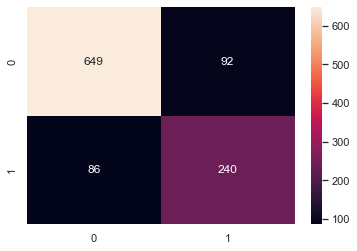

In [89]:
print(sns.heatmap(confusion_matrix(nb.predict(x_train),y_train),annot=True , fmt="2g"));
print(classification_report(nb.predict(x_train),y_train))

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       320
           1       0.72      0.68      0.70       138

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.79       458
weighted avg       0.82      0.83      0.82       458



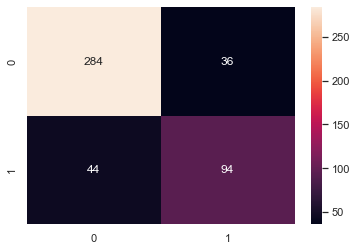

In [90]:
print(sns.heatmap(confusion_matrix(nb.predict(x_test),y_test),annot=True , fmt="2g"));
print(classification_report(nb.predict(x_test),y_test))

AUC: 0.886


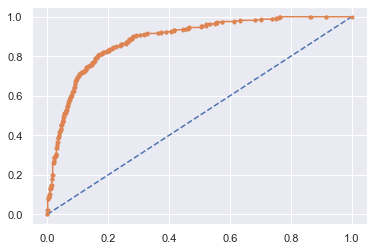

In [91]:
# AUC and ROC for the training data

# predict probabilities
probs = nb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
NB_train_fpr, NB_train_tpr, NB_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr,  NB_train_tpr, marker='.')

AUC: 0.885


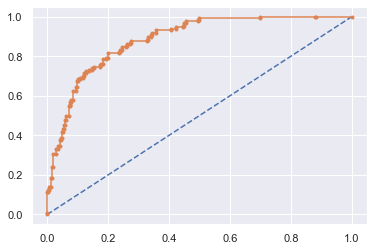

In [93]:
# predict probabilities
probs = nb.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
NB_test_fpr, NB_test_tpr, NB_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr, marker='.')
# show the plot
plt.show()

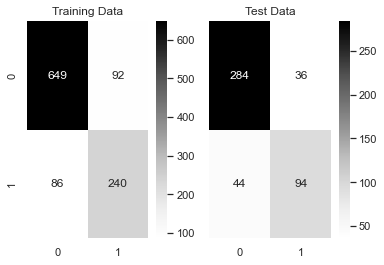

In [94]:
##KNN Model Evaluation

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
    
plot_0 = sns.heatmap(confusion_matrix(nb.predict(x_train),y_train),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap(confusion_matrix(nb.predict(x_test),y_test),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Q6)Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [96]:
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [97]:
ADB_model=AdaBoostClassifier()

In [98]:
grid_search=GridSearchCV(estimator=ADB_model,param_grid=param_grid)

In [99]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]})

In [100]:
ADB_model=grid_search.best_estimator_

In [101]:
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=1000)

0.8350515463917526
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       735
           1       0.78      0.65      0.71       332

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067



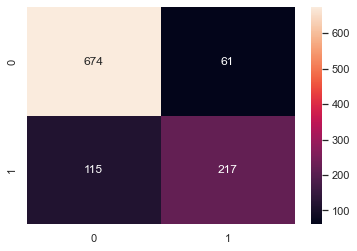

In [102]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)
print(sns.heatmap(confusion_matrix(y_train, y_train_predict),annot=True , fmt="2g"));
print(classification_report(y_train, y_train_predict))

AUC: 0.902


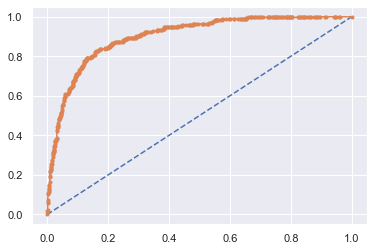

In [103]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
ADA_train_fpr, ADA_train_tpr, ADA_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADA_train_fpr, ADA_train_tpr, marker='.')

0.8318777292576419
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       328
           1       0.73      0.65      0.69       130

    accuracy                           0.83       458
   macro avg       0.80      0.78      0.79       458
weighted avg       0.83      0.83      0.83       458



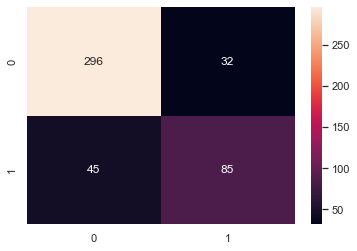

In [104]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)
print(sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True , fmt="2g"));
print( classification_report(y_test, y_test_predict))

AUC: 0.893


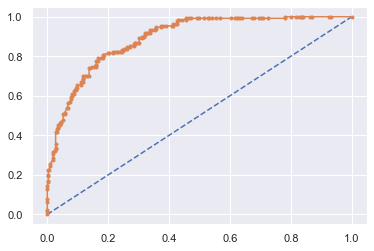

In [106]:
# predict probabilities
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
ADA_test_fpr, ADA_test_tpr, ADA_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADA_test_fpr, ADA_test_tpr, marker='.')
# show the plot
plt.show()

### Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [109]:
DT_model= DecisionTreeClassifier()

In [110]:
grid_search=GridSearchCV(estimator=DT_model,param_grid=param_grid,cv=10)

In [111]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [112]:
DT_model=grid_search.best_estimator_

In [113]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=70,
                       random_state=0)

0.837863167760075
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       735
           1       0.76      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



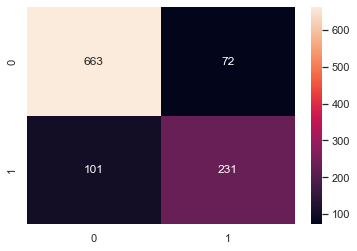

In [114]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(model_score)
print(sns.heatmap(confusion_matrix(y_train, y_train_predict),annot=True , fmt="2g"));
print( classification_report(y_train, y_train_predict))

AUC: 0.896


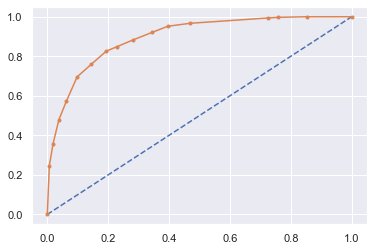

In [115]:
# AUC and ROC for the training data

# predict probabilities
probs = DT_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

0.8144104803493449
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       328
           1       0.67      0.68      0.67       130

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



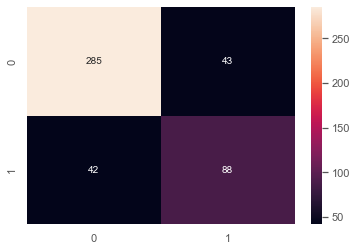

In [158]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(model_score)
print(sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True , fmt="2g"));
print( classification_report(y_test, y_test_predict))

AUC: 0.870


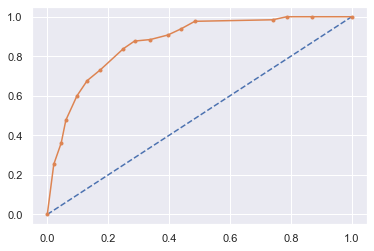

In [116]:
# predict probabilities
probs = DT_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
DT_test_fpr, DT_test_tpr, DT_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(DT_test_fpr, DT_test_tpr, marker='.')
# show the plot
plt.show()

### Random forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [119]:
RF_model=RandomForestClassifier()

In [120]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)

In [121]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [122]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=30,
                       random_state=0)

In [123]:
RF_model=grid_search.best_estimator_

In [124]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=30,
                       random_state=0)

0.8388003748828491
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       735
           1       0.81      0.63      0.71       332

    accuracy                           0.84      1067
   macro avg       0.83      0.78      0.80      1067
weighted avg       0.84      0.84      0.83      1067



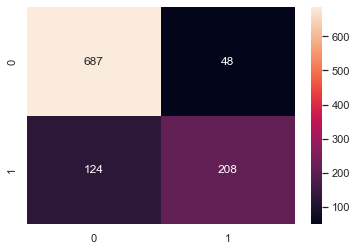

In [125]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(x_train)
model_score =RF_model.score(x_train, y_train)
print(model_score)
print(sns.heatmap(confusion_matrix(y_train, y_train_predict),annot=True , fmt="2g"));
print( classification_report(y_train, y_train_predict))

AUC: 0.906


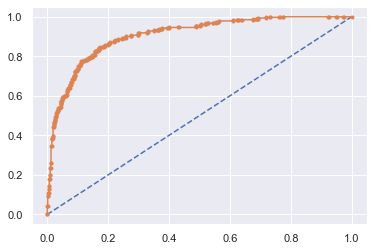

In [126]:
# AUC and ROC for the training data

# predict probabilities
probs = RF_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
RF_train_fpr, RF_train_tpr, RF_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_train_fpr, RF_train_tpr, marker='.')

0.834061135371179
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       328
           1       0.75      0.63      0.68       130

    accuracy                           0.83       458
   macro avg       0.80      0.77      0.79       458
weighted avg       0.83      0.83      0.83       458



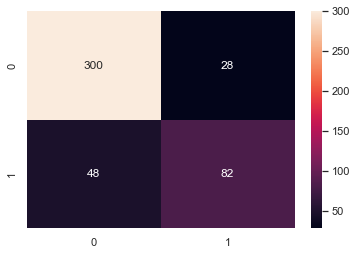

In [127]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(x_test)
model_score = RF_model.score(x_test, y_test)
print(model_score)
print(sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True , fmt="2g"));
print( classification_report(y_test, y_test_predict))

AUC: 0.895


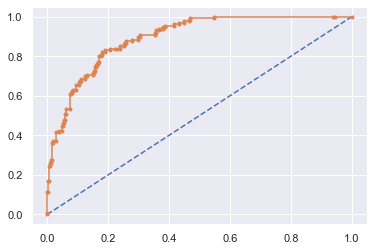

In [130]:
# predict probabilities
probs = RF_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
RF_test_fpr, RF_test_tpr, RF_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_test_fpr, RF_test_tpr, marker='.')
# show the plot
plt.show()

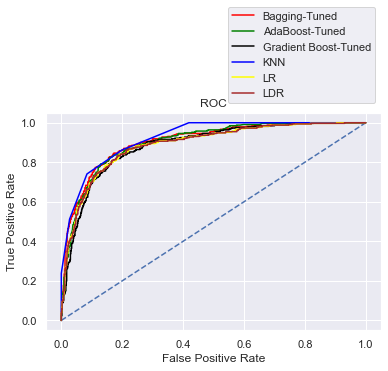

In [131]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(RF_train_fpr, RF_train_tpr,color='red',label="Bagging-Tuned")
plt.plot(ADA_train_fpr,ADA_train_tpr,color='green',label="AdaBoost-Tuned")
plt.plot(NB_train_fpr,NB_train_tpr,color='black',label="Gradient Boost-Tuned")
plt.plot(KNN_train_fpr,KNN_train_tpr,color='blue',label="KNN")
plt.plot(LR_train_fpr,LR_train_tpr,color='yellow',label="LR")
plt.plot(LDR_train_fpr,LDR_train_tpr,color='brown',label="LDR")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');


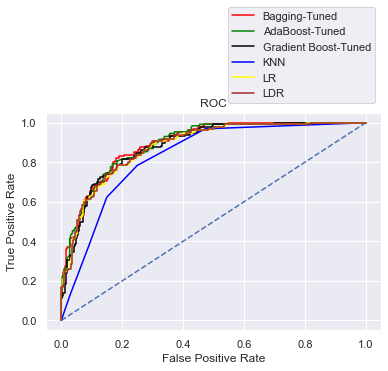

In [132]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(RF_test_fpr, RF_test_tpr,color='red',label="Bagging-Tuned")
plt.plot(ADA_test_fpr,ADA_test_tpr,color='green',label="AdaBoost-Tuned")
plt.plot(NB_test_fpr,NB_test_tpr,color='black',label="Gradient Boost-Tuned")
plt.plot(KNN_test_fpr,KNN_test_tpr,color='blue',label="KNN")
plt.plot(LR_test_fpr,LR_test_tpr,color='yellow',label="LR")
plt.plot(LDA_test_fpr,LDA_test_tpr,color='brown',label="LDR")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');


Q8) Based on these predictions, what are the insights

1)Comparing all the performance measure, Naïve Bayes model from second iteration is performing best. Although there are some other models such as SVM and Extreme Boosting which is performing almost same as that of Naïve Bayes. But Naïve Bayes model is very consistent when train and test results are compared with each other. Along with other parameters such as Recall value, AUC_SCORE and AUC_ROC_Curve, those results were pretty good is this model.

2)Labour party is performing better than Conservative from huge margin.

3)Female voters turn out is greater than the male voters.

4)Those who have better national economic conditions are preferring to vote for Labour party. 5)Persons having higher Eurosceptic sentiments conservative party are preferring to vote for Conservative party. 6)Those who have higher political knowledge have voted for Conservative party 7)Looking at the assessment for both the leaders, Labour Leader is performing well as he has got better ratings in assessment.

In [133]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
nltk.download('punkt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [134]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [135]:
print("The No. of character,words and sentences present in President Franklin D.Roosevelt's speech are",len(inaugural.raw('1941-Roosevelt.txt')),",",len(inaugural.words('1941-Roosevelt.txt')),"and",len(inaugural.sents('1941-Roosevelt.txt')),"Respectively")

print("The No. of character,words and sentences present in President John F.Kennedy's speech are",len(inaugural.raw('1961-Kennedy.txt')),",",len(inaugural.words('1961-Kennedy.txt')),"and",len(inaugural.sents('1961-Kennedy.txt')),"Respectively")

print("The No. of character,words and sentences present in President Richard Nixon's speech are",len(inaugural.raw('1973-Nixon.txt')),",",len(inaugural.words('1973-Nixon.txt')),"and",len(inaugural.sents('1973-Nixon.txt')),"Respectively")

The No. of character,words and sentences present in President Franklin D.Roosevelt's speech are 7571 , 1536 and 68 Respectively
The No. of character,words and sentences present in President John F.Kennedy's speech are 7618 , 1546 and 52 Respectively
The No. of character,words and sentences present in President Richard Nixon's speech are 9991 , 2028 and 69 Respectively


In [136]:
import re # this is the regular expression library which helps us search for or extract matching patterns from a given string
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('ggplot')

In [137]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sudhe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [138]:
import string
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)

In [139]:
stopwords.extend(["--", "us","let","new","sides","know"])

In [140]:
PR_1941=[]
def lower(x):
    for w in inaugural.words('1941-Roosevelt.txt'):
        words=w.lower()
        PR_1941.append(words)
lower(inaugural.words('1941-Roosevelt.txt'))
PR_1941

['on',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789',
 ',',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'united',
 'states',
 '.',
 'in',
 'washington',
 "'",
 's',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'create',
 'and',
 'weld',
 'together',
 'a',
 'nation',
 '.',
 'in',
 'lincoln',
 "'",
 's',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'preserve',
 'that',
 'nation',
 'from',
 'disruption',
 'from',
 'within',
 '.',
 'in',
 'this',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'is',
 'to',
 'save',
 'that',
 'nation',
 'and',
 'its',
 'institutions',
 'from',
 'disruption',
 'from',
 'without',
 '.',
 'to',
 'us',
 'there',
 'has',
 'come',
 'a',
 'time',
 ',',
 'in',
 'the',
 'midst',
 'of',
 'swift',
 'happenings',
 ',',
 'to',
 'pause',
 'for',
 'a',
 'moment',
 'and',
 'take',
 'stock',
 '--',
 'to',
 'recall',
 'what',
 'our',
 'place',
 'in'

In [141]:
PR_1941_clean=[]
def clean(x):
    for word in PR_1941:
        if word not in stopwords:
            PR_1941_clean.append(word)
clean(PR_1941)
len(PR_1941_clean)

608

In [142]:
PK_1961=[]
def lower(x):
    for w in inaugural.words('1961-Kennedy.txt'):
        words=w.lower()
        PK_1961.append(words)
lower(inaugural.words('1961-Kennedy.txt'))
PK_1961

['vice',
 'president',
 'johnson',
 ',',
 'mr',
 '.',
 'speaker',
 ',',
 'mr',
 '.',
 'chief',
 'justice',
 ',',
 'president',
 'eisenhower',
 ',',
 'vice',
 'president',
 'nixon',
 ',',
 'president',
 'truman',
 ',',
 'reverend',
 'clergy',
 ',',
 'fellow',
 'citizens',
 ',',
 'we',
 'observe',
 'today',
 'not',
 'a',
 'victory',
 'of',
 'party',
 ',',
 'but',
 'a',
 'celebration',
 'of',
 'freedom',
 '--',
 'symbolizing',
 'an',
 'end',
 ',',
 'as',
 'well',
 'as',
 'a',
 'beginning',
 '--',
 'signifying',
 'renewal',
 ',',
 'as',
 'well',
 'as',
 'change',
 '.',
 'for',
 'i',
 'have',
 'sworn',
 'i',
 'before',
 'you',
 'and',
 'almighty',
 'god',
 'the',
 'same',
 'solemn',
 'oath',
 'our',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'a',
 'century',
 'and',
 'three',
 'quarters',
 'ago',
 '.',
 'the',
 'world',
 'is',
 'very',
 'different',
 'now',
 '.',
 'for',
 'man',
 'holds',
 'in',
 'his',
 'mortal',
 'hands',
 'the',
 'power',
 'to',
 'abolish',
 'all',
 'forms',
 'of',
 

In [143]:
PK_1961_clean=[]
def clean(x):
    for word in PK_1961:
        if word not in stopwords:
            PK_1961_clean.append(word)
clean(PK_1961)
len(PK_1961_clean)

651

In [145]:
PN_1973=[]
def lower(x):
    for w in inaugural.words('1973-Nixon.txt'):
        words=w.lower()
        PN_1973.append(words)
lower(inaugural.words('1973-Nixon.txt'))
PN_1973

['mr',
 '.',
 'vice',
 'president',
 ',',
 'mr',
 '.',
 'speaker',
 ',',
 'mr',
 '.',
 'chief',
 'justice',
 ',',
 'senator',
 'cook',
 ',',
 'mrs',
 '.',
 'eisenhower',
 ',',
 'and',
 'my',
 'fellow',
 'citizens',
 'of',
 'this',
 'great',
 'and',
 'good',
 'country',
 'we',
 'share',
 'together',
 ':',
 'when',
 'we',
 'met',
 'here',
 'four',
 'years',
 'ago',
 ',',
 'america',
 'was',
 'bleak',
 'in',
 'spirit',
 ',',
 'depressed',
 'by',
 'the',
 'prospect',
 'of',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'and',
 'of',
 'destructive',
 'conflict',
 'at',
 'home',
 '.',
 'as',
 'we',
 'meet',
 'here',
 'today',
 ',',
 'we',
 'stand',
 'on',
 'the',
 'threshold',
 'of',
 'a',
 'new',
 'era',
 'of',
 'peace',
 'in',
 'the',
 'world',
 '.',
 'the',
 'central',
 'question',
 'before',
 'us',
 'is',
 ':',
 'how',
 'shall',
 'we',
 'use',
 'that',
 'peace',
 '?',
 'let',
 'us',
 'resolve',
 'that',
 'this',
 'era',
 'we',
 'are',
 'about',
 'to',
 'enter',
 'will',
 'not',
 'be',
 '

In [146]:
PN_1973_clean=[]
def clean(x):
    for word in PN_1973:
        if word not in stopwords:
            PN_1973_clean.append(word)
clean(PN_1973)
len(PN_1973_clean)

773

In [147]:
nltk.FreqDist(PR_1941_clean).most_common(4)

[('nation', 12), ('spirit', 9), ('life', 9), ('democracy', 9)]

In [148]:
nltk.FreqDist(PK_1961_clean).most_common(4)

[('world', 8), ('pledge', 7), ('citizens', 5), ('power', 5)]

In [149]:
nltk.FreqDist(PN_1973_clean).most_common(4)

[('america', 21), ('peace', 19), ('world', 18), ('nation', 11)]

In [150]:
wc_PR = ' '.join(PR_1941_clean)
wc_PK = ' '.join(PK_1961_clean)
wc_PN = ' '.join(PN_1973_clean)

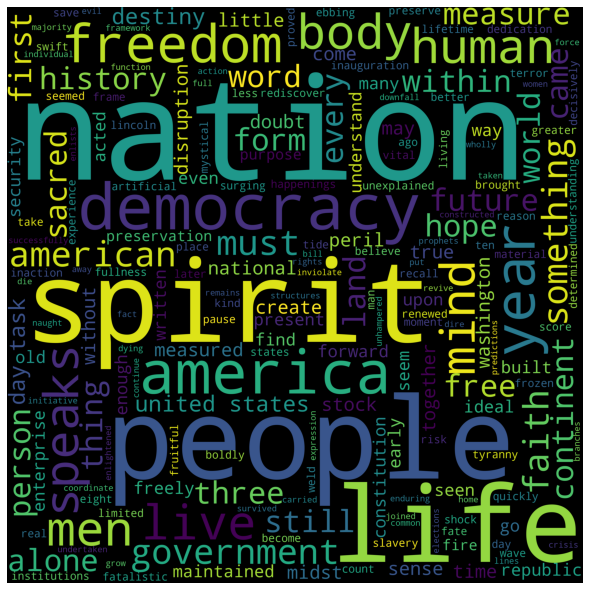

In [151]:

## Word Cloud 
from wordcloud import WordCloud
# wordcloud = WordCloud().generate(wc_a) if ok with default wordcloud parameters

wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_PR) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0)

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud function!

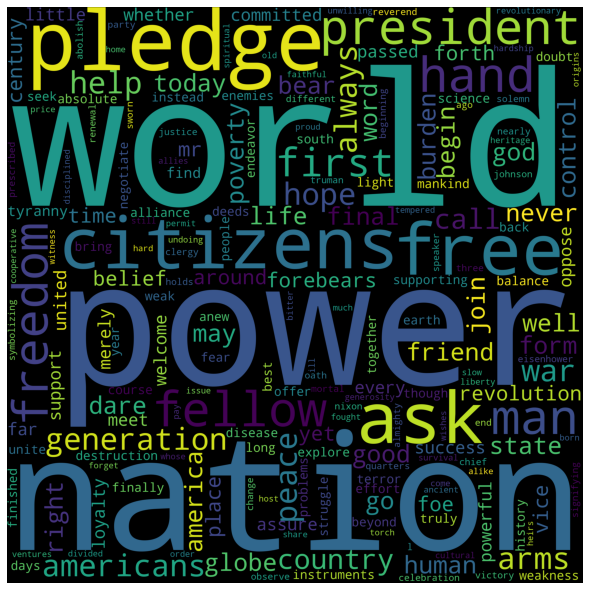

In [152]:
## Word Cloud 
from wordcloud import WordCloud
# wordcloud = WordCloud().generate(wc_a) if ok with default wordcloud parameters

wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_PK) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0)

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud function!

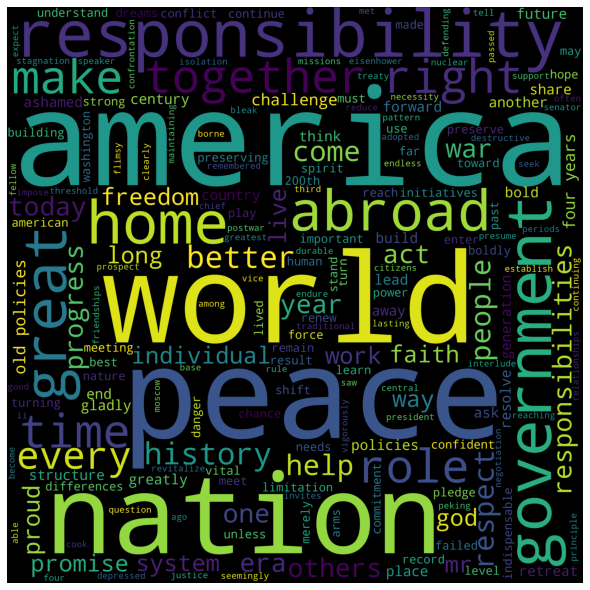

In [153]:
## Word Cloud 
from wordcloud import WordCloud
# wordcloud = WordCloud().generate(wc_a) if ok with default wordcloud parameters

wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_PN) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0)

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud function!